# Decision Tree 

In [1]:
# importing dependiences
import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score

# Reading Data

In [2]:
df = pd.read_csv("voice.csv")

# Converting Categorical Values into Numerical Values

In [3]:
df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [4]:
x = df.drop(['label'],axis=1)
y = df.label.values

# Splitting Dataset into Training and Testing Set¶

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 50)

# Decision Tree Using Entropy

In [6]:
# Implementing entropy
import time
classifier= DecisionTreeClassifier(criterion='entropy',random_state = 30,max_depth=10, min_samples_leaf=8)  
start = time.perf_counter()
classifier.fit(x_train, y_train)  
end = time.perf_counter()
print("Decision Tree Classification Score: ",classifier.score(x_test,y_test))
predications = classifier.predict(x_test)
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Time Taken : " + str(end-start))

Decision Tree Classification Score:  0.9511041009463722
Score on training dataset : 0.9865824782951855
Score on testing dataset : 0.9511041009463722
Out of total 634 samples 603 samples were predicted correctly
Time Taken : 0.05687510000001339


# Classification Report

In [7]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       324
           1       0.95      0.95      0.95       310

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Confusion Matrix

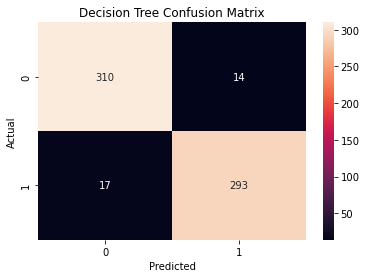

In [8]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Decision Tree Using Gini

In [9]:
# Implementing gini
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 30,max_depth=10, min_samples_leaf=8)
start = time.perf_counter()
clf_gini.fit(x_train, y_train) 
end = time.perf_counter()
print("Decision Tree Classification Score: ",classifier.score(x_test,y_test))
predications = classifier.predict(x_test)
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Time Taken : " + str(end-start))

Decision Tree Classification Score:  0.9511041009463722
Score on training dataset : 0.9865824782951855
Score on testing dataset : 0.9511041009463722
Out of total 634 samples 603 samples were predicted correctly
Time Taken : 0.043956899999983534


In [10]:
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
kappascore =cohen_kappa_score(y_test,predications)
prescor = precision_score(y_test, predications)

In [11]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9511041009463722
Precision score :0.9543973941368078
Recall score :0.9451612903225807
F1 score :0.9497568881685575


# Classification Report

In [12]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       324
           1       0.95      0.95      0.95       310

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Confusion Matrix

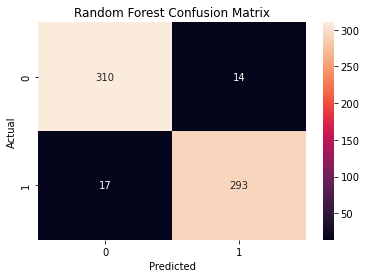

In [13]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Important Features

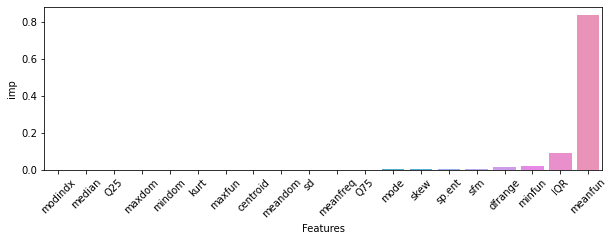

In [14]:
imp = classifier.feature_importances_
data = pd.DataFrame({"Features": x_train.columns,"imp":imp})
data.set_index("imp")
data = data.sort_values("imp")
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sb.barplot(x="Features",y="imp",data=data)

# GridSearchCV

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 882 out of 882 | elapsed:   33.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [60]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=18, random_state=42)

In [15]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state = 42, max_leaf_nodes=18)  
start = time.perf_counter()
classifier.fit(x_train, y_train)  
end = time.perf_counter()
predications = classifier.predict(x_test)
print ("Score on training dataset :",classifier.score(x_train,y_train))
print("Score on testing dataset :",classifier.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Time Taken : " + str(end-start))

Score on training dataset : 0.9830307813733228
Score on testing dataset : 0.9542586750788643
Out of total 634 samples 605 samples were predicted correctly
Time Taken : 0.07573100000001887


In [16]:
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
kappascore =cohen_kappa_score(y_test,predications)
prescor = precision_score(y_test, predications)

In [17]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9542586750788643
Precision score :0.9698996655518395
Recall score :0.9354838709677419
F1 score :0.9523809523809524


# Confusion Matrix

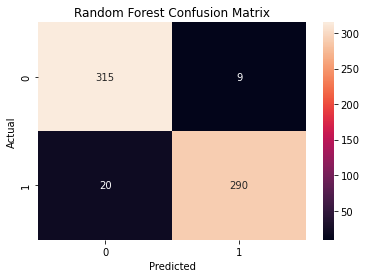

In [18]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve

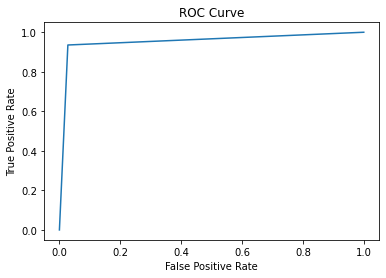

Area Under ROC Curve: 0.9538530465949822


In [19]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Recursive Feature Elimination

In [20]:
from sklearn.feature_selection import RFE
dt_classifier= DecisionTreeClassifier(criterion='entropy', random_state = 42, max_leaf_nodes=18)  
rfe = RFE(estimator = dt_classifier,step=1)
rfe.fit(x_train,y_train)
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)

In [21]:
selected_features = pd.DataFrame({'Feature':list(x_train.columns),
                         'Ranking':rfe.ranking_})
selected_features.sort_values(by = 'Ranking')

,Feature,Ranking
9,sfm,1
17,maxdom,1
16,mindom,1
13,minfun,1
12,meanfun,1
11,centroid,1
10,mode,1
18,dfrange,1
19,modindx,1
5,IQR,1


In [22]:
start = time.perf_counter()
dt_classifier.fit(x_train_selected,y_train)
end = time.perf_counter()
predications = dt_classifier.predict(x_test_selected)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Scores After Recursive Feature Elimination :",format(dt_classifier.score(x_test_selected,y_test)))
print("Time Taken : " + str(end-start))
start = time.perf_counter()
classifier.fit(x_train,y_train)
end = time.perf_counter()
predications1 = classifier.predict(x_test)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications1,normalize = False))+" samples were predicted correctly")
print("Scores :",format(classifier.score(x_test,y_test)))
print("Time Taken : " + str(end-start))

Out of total 634 samples 606 samples were predicted correctly
Scores After Recursive Feature Elimination : 0.9558359621451105
Time Taken : 0.02640660000000139
Out of total 634 samples 605 samples were predicted correctly
Scores : 0.9542586750788643
Time Taken : 0.043774700000000166


# Best Model

In [23]:
start = time.perf_counter()
dt_classifier.fit(x_train_selected,y_train)
end = time.perf_counter()
predications = dt_classifier.predict(x_test_selected)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Scores :",format(dt_classifier.score(x_test_selected,y_test)))
print("Time Taken : " + str(end-start))

Out of total 634 samples 606 samples were predicted correctly
Scores : 0.9558359621451105
Time Taken : 0.028205600000006825


# ROC Curve

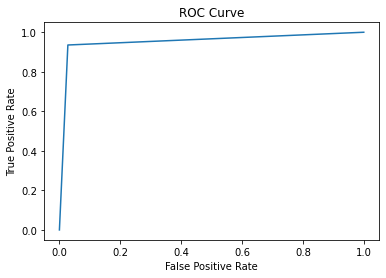

Area Under ROC Curve: 0.9538530465949822


In [24]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications1, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Classification Report

In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications1)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       324
           1       0.97      0.94      0.95       310

    accuracy                           0.95       634
   macro avg       0.96      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



# Confusion Matrix

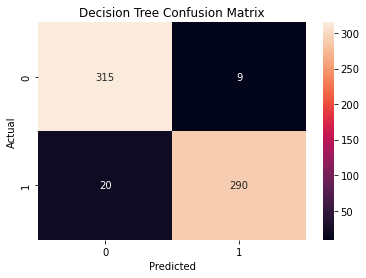

In [28]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications1)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Decison Tree

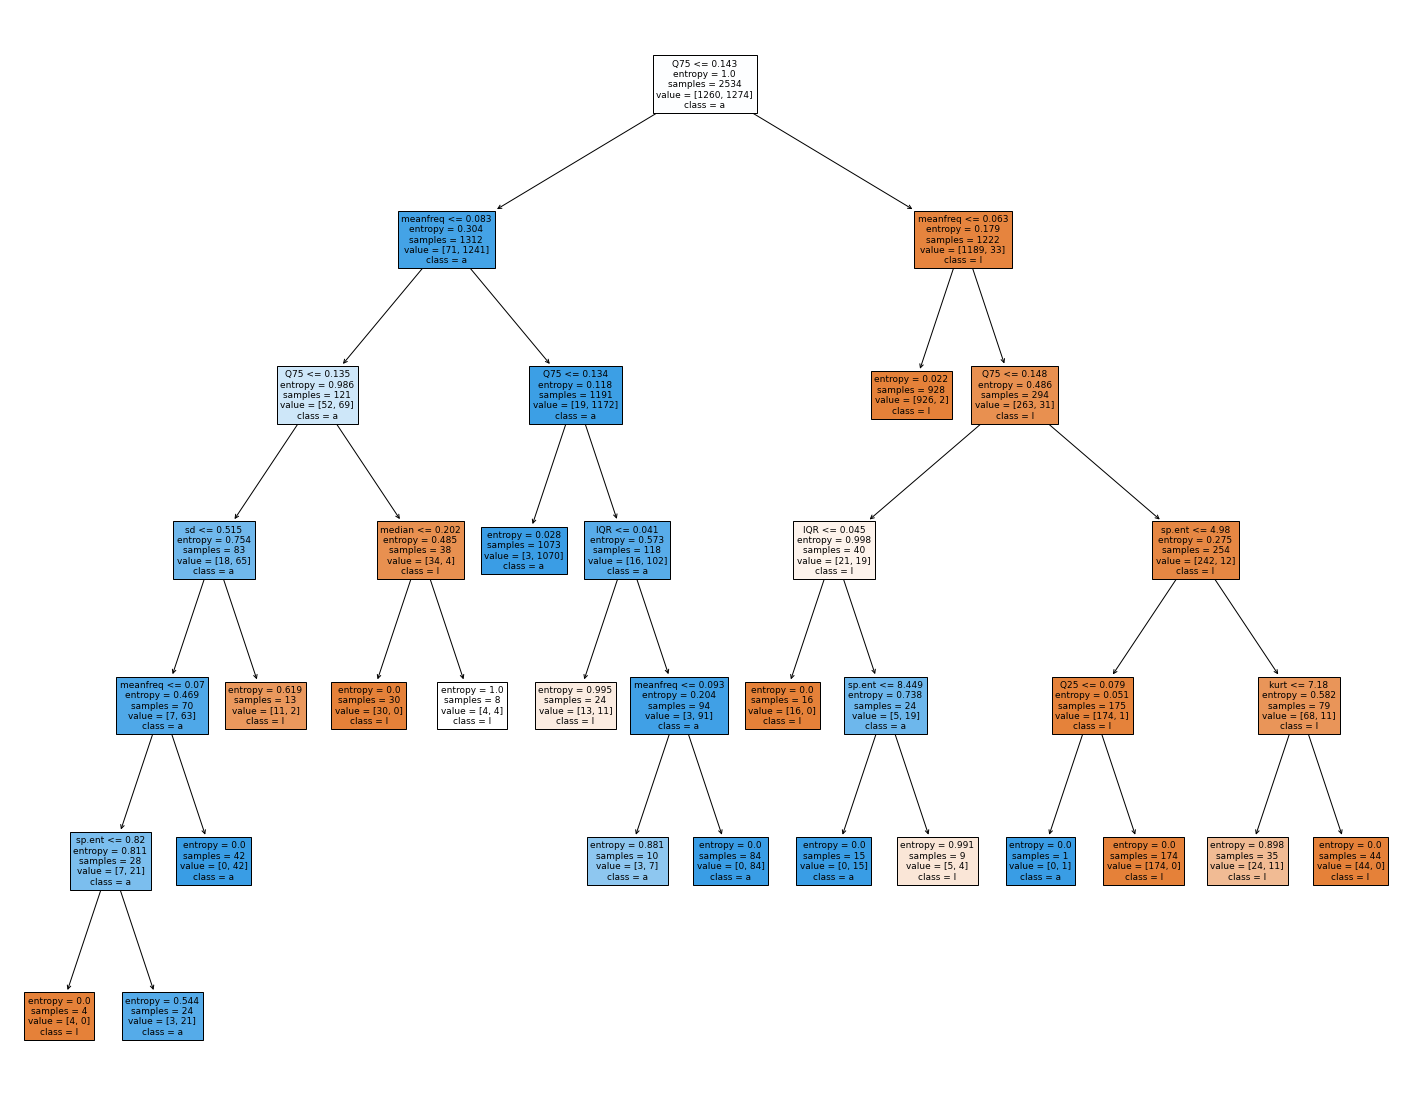

In [26]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=df.columns,  
                   class_names='label',
                   filled=True)


# Testing

In [6]:
test = pd.read_csv("Testing.csv")

In [7]:
test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.210115,0.040807,0.207951,0.189843,0.241688,0.051845,1.976478,8.005091,0.893176,0.132964,...,0.210115,0.132198,0.028021,0.275862,1.459780,0.187500,6.500000,6.312500,0.283416,male
1,0.209754,0.043248,0.211459,0.187445,0.243812,0.056367,1.502917,4.804347,0.903864,0.146604,...,0.209754,0.132550,0.020592,0.271186,1.658594,0.000000,6.890625,6.890625,0.228240,male
2,0.204773,0.040299,0.206353,0.187319,0.228945,0.041626,2.029097,7.157829,0.889091,0.133677,...,0.204773,0.135180,0.051948,0.275862,1.351283,0.187500,6.664062,6.476562,0.295135,male
3,0.209101,0.037820,0.211808,0.189077,0.231439,0.042362,2.140739,7.972400,0.881541,0.115100,...,0.209101,0.125872,0.031250,0.228571,0.472656,0.234375,0.820312,0.585938,0.246061,male
4,0.210325,0.045356,0.212845,0.180331,0.249236,0.068906,1.342613,4.600114,0.912661,0.143528,...,0.210325,0.121172,0.017957,0.275862,1.128534,0.179688,6.414062,6.234375,0.199217,male


In [8]:
test['label'] = [1 if i=='male' else 0 for i in test.label]
test.label.value_counts()

1    40
0    40
Name: label, dtype: int64

In [9]:
x = test.drop(['label'],axis=1)
y = test.label.values

In [10]:
x_test = pd.DataFrame(x) 
y_test = pd.DataFrame(y)

In [11]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state = 42, max_leaf_nodes=18)  
classifier.fit(x_train,y_train)
predications = classifier.predict(x_test)

In [12]:
print('Accuracy Score:   ',end=" ")
print(metrics.accuracy_score(y_test,predications))


Accuracy Score:    0.8
